In [1]:
import re
import pandas as pd
from typing import Dict

COLUMN_TYPES = (
    # Metadata
    (re.compile(r"^user_n_games_bucket$"), "int16"),
    (re.compile(r"^user_game_win_rate_bucket$"), "float32"),
    (re.compile(r"^expansion$"), "str"),
    (re.compile(r"^event_type$"), "str"),
    (re.compile(r"^draft_id$"), "str"),
    (re.compile(r"^draft_time$"), "str"),
    (re.compile(r"^rank$"), "str"),
    # Draft
    (re.compile(r"^event_match_wins$"), "int8"),
    (re.compile(r"^event_match_losses$"), "int8"),
    (re.compile(r"^pack_number$"), "int8"),
    (re.compile(r"^pick_number$"), "int8"),
    (re.compile(r"^pick$"), "str"),
    (re.compile(r"^pick_maindeck_rate$"), "float32"),
    (re.compile(r"^pick_sideboard_in_rate$"), "float32"),
    (re.compile(r"^pool_.*"), "int8"),
    (re.compile(r"^pack_card_.*"), "int8"),
    # Game + Replay
    (re.compile(r"^game_time$"), "str"),
    (re.compile(r"^build_index$"), "int8"),
    (re.compile(r"^match_number$"), "int8"),
    (re.compile(r"^game_number$"), "int8"),
    (re.compile(r"^opp_rank$"), "str"),
    (re.compile(r"^main_colors$"), "str"),
    (re.compile(r"^splash_colors$"), "str"),
    (re.compile(r"^on_play$"), "bool"),
    (re.compile(r"^num_mulligans$"), "int8"),
    (re.compile(r"^opp_num_mulligans$"), "int8"),
    (re.compile(r"^opp_colors$"), "str"),
    (re.compile(r"^num_turns$"), "int8"),
    (re.compile(r"^won$"), "bool"),
    (re.compile(r"^deck_.*"), "int8"),
    (re.compile(r"^sideboard_.*"), "int8"),
    # Game
    (re.compile(r"^drawn_.*"), "int8"),
    (re.compile(r"^tutored_.*"), "int8"),
    (re.compile(r"^opening_hand_.*"), "int8"),
    # Replay
    (re.compile(r"^candidate_hand_\d$"), "str"),
    (re.compile(r"^opening_hand$"), "str"),
    (re.compile(r"^user_turn_\d+_cards_drawn$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_cards_discarded$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_lands_played$"), "str"),
    (re.compile(r"^user_turn_\d+_cards_foretold$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_creatures_cast$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_non_creatures_cast$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_instants_sorceries_cast$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_abilities$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_cards_learned$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_creatures_attacked$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_creatures_blocked$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_creatures_unblocked$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_creatures_blocking$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_creatures_blitzed$"), "int8"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_player_combat_damage_dealt$"), "str"),  # DEPRECATED
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_combat_damage_taken$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_creatures_killed_combat$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_creatures_killed_non_combat$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_((user)|(oppo))_mana_spent$"), "float32"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_user_cards_in_hand$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_oppo_cards_in_hand$"), "float32"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_((user)|(oppo))_lands_in_play$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_((user)|(oppo))_creatures_in_play$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_((user)|(oppo))_non_creatures_in_play$"), "str"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_((user)|(oppo))_life$"), "float32"),
    (re.compile(r"^((user)|(oppo))_turn_\d+_eot_((user)|(oppo))_poison_counters$"), "float32"),
    (re.compile(r"^user_turn_\d+_cards_tutored$"), "str"),
    (re.compile(r"^oppo_turn_\d+_cards_tutored$"), "int8"),
    (re.compile(r"^oppo_turn_\d+_cards_drawn_or_tutored$"), "int8"),
    (re.compile(r"^oppo_turn_\d+_cards_drawn$"), "int8"),
    (re.compile(r"^oppo_turn_\d+_cards_foretold$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_cards_drawn$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_cards_discarded$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_lands_played$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_cards_foretold$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_creatures_cast$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_creatures_blitzed$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_non_creatures_cast$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_instants_sorceries_cast$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_cards_learned$"), "int8"),
    (re.compile(r"^((user)|(oppo))_total_mana_spent$"), "int16"),
    (re.compile(r"^oppo_total_cards_drawn_or_tutored$"), "int8"),
)


def get_dtypes(filename: str, print_missing: bool = False) -> Dict[str, str]:
    dtypes: Dict[str, str] = {}
    for column in pd.read_csv(filename, nrows=0).columns:
        for regex, column_type in COLUMN_TYPES:
            if regex.match(column):
                dtypes[column] = column_type
                break
        else:
            if print_missing:
                print(f"Could not find an appropriate type for {column}")

    return dtypes

In [2]:
#Getting rectangle counts from oracle text

import pandas as pd

df = pd.read_csv('All Cards With Desc.csv')

# Initialize the 'rectangles' column
df['rectangles'] = 0

# Filter for rows where 'set' is 'Wilds of Eldraine'
df_wilds_of_eldraine = df[df['set'] == 'Wilds of Eldraine']

# Define a function to calculate the rectangle score
def calculate_rectangle_score(row):
    score = 0

    # Check for Creature, Enchantment, or Artifact in 'type_line'
    if any(x in row['type_line'] for x in ['Creature', 'Enchantment', 'Artifact']):
        score += 1

    # Check if 'oracle_text' is a string
    if pd.notnull(row['oracle_text']) and isinstance(row['oracle_text'], str):
        # Process 'oracle_text'
        oracle_text = row['oracle_text'].lower()
        words = oracle_text.split()
        for i, word in enumerate(words):
            if word == 'create':
                if i+1 < len(words):
                    next_word = words[i+1]
                    if next_word == 'a':
                        score += 1
                    elif next_word == 'two':
                        score += 2
                    elif next_word == 'three':
                        score += 3

    return score

# Apply the function to each row
df_wilds_of_eldraine['rectangles'] = df_wilds_of_eldraine.apply(calculate_rectangle_score, axis=1)

WOE_rectangles = df_wilds_of_eldraine

WOE_rectangles.head()


C:\Users\dclas\AppData\Local\Temp\ipykernel_8316\3351084473.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wilds_of_eldraine['rectangles'] = df_wilds_of_eldraine.apply(calculate_rectangle_score, axis=1)


,set,name,cmc,mana_cost,power,toughness,keywords,oracle_text,rarity,color_identity,type_line,produced_mana,Removal,Method,Toughness Requirement,Power Requirement,Other Specifications,rectangles
0,Wilds of Eldraine,Agatha of the Vile Cauldron,2.0,{R}{G},1,1,NaN,Activated abilities of creatures you control c...,mythic,"G, R",Legendary Creature — Human Warlock,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Wilds of Eldraine,Agatha's Champion,5.0,{4}{G},4,4,"Trample, Fight, Bargain","Bargain (You may sacrifice an artifact, enchan...",uncommon,G,Creature — Human Knight,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Wilds of Eldraine,Agatha's Soul Cauldron,2.0,{2},NaN,NaN,NaN,You may spend mana as though it were mana of a...,mythic,NaN,Legendary Artifact,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Wilds of Eldraine,Aquatic Alchemist,2.0,{1}{U},1,3,NaN,Whenever you cast your first instant or sorcer...,common,U,Creature — Elemental,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Wilds of Eldraine,Bubble Up,3.0,{2}{U},NaN,NaN,NaN,Put target instant or sorcery card from your g...,common,U,Sorcery — Adventure,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
#Total Rectangles per player

import pandas as pd
import ast
import re

# Load 'cards.csv'
cards = pd.read_csv('cards.csv')

# Map card IDs to names
card_id_to_name = dict(zip(cards['id'], cards['name']))

# Map card names to rectangles
card_name_to_rectangle = dict(zip(WOE_rectangles['name'], WOE_rectangles['rectangles']))

def get_active_player(column_name):
    parts = column_name.split('_')
    for part in reversed(parts):
        if part in ['user', 'oppo']:
            return part
    return None

def calculate_rectangles(row, player_prefix):
    total_rectangles = 0
    num_turns = row['num_turns']

def calculate_rectangles(row, player_prefix):
    total_rectangles = 0
    num_turns = row['num_turns']

    #print(f"Calculating for {player_prefix}, number of turns: {num_turns}")  # Debugging print

    # Regular expression pattern to match relevant column names
    pattern = re.compile(rf'^{player_prefix}_turn_(\d+)_(creatures_cast|non_creatures_cast|user_instants_sorceries_cast|oppo_instants_sorceries_cast|user_abilities|oppo_abilities)$')
    
    for column in row.index:
        match = pattern.match(column)
        if match:
            turn = int(match.group(1))
            if turn <= num_turns:
                card_ids = row[column]
                if pd.notnull(card_ids):
                    # Ensure card_ids is always a list
                    if isinstance(card_ids, (int, float)):
                        card_ids = [int(card_ids)]  # Convert single number to list
                    elif isinstance(card_ids, str):
                        try:
                            card_ids = ast.literal_eval(card_ids)
                            if isinstance(card_ids, int):
                                card_ids = [card_ids]
                        except:
                            continue

                    active_player = get_active_player(column)
                    #print(f"Column: {column}, Active Player: {active_player}, Card IDs: {card_ids}")  # Debugging print
                    if active_player == player_prefix:
                        for card_id in card_ids:
                            card_name = card_id_to_name.get(card_id, None)
                            if card_name:
                                rectangles = card_name_to_rectangle.get(card_name, 0)
                                total_rectangles += rectangles
                                #print(f"Adding {rectangles} rectangles for card {card_name}")  # Debugging print

    return total_rectangles


# Get dtypes for the 'replay_data_public.WOE.PremierDraft.csv'
dtypes = get_dtypes('replay_data_public.WOE.PremierDraft.csv', print_missing=True)

# Initialize an empty DataFrame
final_data = pd.DataFrame()

chunk_size = 10000
for chunk in pd.read_csv('replay_data_public.WOE.PremierDraft.csv', chunksize=chunk_size, dtype=dtypes):
    # Calculate rectangles for user and opponent in each chunk
    chunk['user_rectangles'] = chunk.apply(lambda row: calculate_rectangles(row, 'user'), axis=1)
    chunk['oppo_rectangles'] = chunk.apply(lambda row: calculate_rectangles(row, 'oppo'), axis=1)

    # Append the processed chunk to the final DataFrame
    final_data = pd.concat([final_data, chunk], ignore_index=True)

    print("processing chunk")  
    #break

final_data.head(30)



processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chu

,expansion,event_type,draft_id,draft_time,build_index,match_number,game_number,game_time,rank,opp_rank,...,oppo_turn_24_cards_drawn_or_tutored,oppo_turn_25_cards_drawn_or_tutored,oppo_turn_26_cards_drawn_or_tutored,oppo_turn_27_cards_drawn_or_tutored,oppo_turn_28_cards_drawn_or_tutored,oppo_turn_29_cards_drawn_or_tutored,oppo_turn_30_cards_drawn_or_tutored,oppo_total_cards_drawn_or_tutored,user_rectangles,oppo_rectangles
0,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,1,1,2023-08-31 21:32:34,bronze,NaN,...,0,0,0,0,0,0,0,7,6,5
1,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,2,1,2023-08-31 21:36:58,bronze,NaN,...,0,0,0,0,0,0,0,6,5,5
2,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,3,1,2023-08-31 21:48:44,bronze,NaN,...,0,0,0,0,0,0,0,7,8,8
3,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,4,1,2023-08-31 21:56:26,bronze,NaN,...,0,0,0,0,0,0,0,7,8,8
4,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,5,1,2023-08-31 22:08:34,bronze,NaN,...,0,0,0,0,0,0,0,6,4,7
5,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,6,1,2023-08-31 22:20:15,bronze,NaN,...,0,0,0,0,0,0,0,10,10,6
6,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,7,1,2023-08-31 22:34:10,bronze,NaN,...,0,0,0,0,0,0,0,8,7,7
7,WOE,PremierDraft,d8af6ac22fe946558376d57bf073e365,2023-08-31 22:37:05,0,1,1,2023-08-31 23:08:21,bronze,NaN,...,0,0,0,0,0,0,0,10,8,11
8,WOE,PremierDraft,d8af6ac22fe946558376d57bf073e365,2023-08-31 22:37:05,0,2,1,2023-08-31 23:25:00,bronze,NaN,...,0,0,0,0,0,0,0,11,18,12
9,WOE,PremierDraft,d8af6ac22fe946558376d57bf073e365,2023-08-31 22:37:05,1,3,1,2023-08-31 23:40:04,bronze,NaN,...,0,0,0,0,0,0,0,17,4,4


In [44]:
#Rectangles per player per turn

import pandas as pd
import ast
import re

cards = pd.read_csv('cards.csv')

# Map card IDs to names
card_id_to_name = dict(zip(cards['id'], cards['name']))

# Map card names to rectangles
card_name_to_rectangle = dict(zip(WOE_rectangles['name'], WOE_rectangles['rectangles']))

def get_active_player(column_name):
    parts = column_name.split('_')
    for part in reversed(parts):
        if part in ['user', 'oppo']:
            return part
    return None

def calculate_rectangles(row, player_prefix):
    rectangles_per_turn = []
    total_rectangles = 0
    num_turns = row['num_turns']

    
    #print(f"Processing new game of {num_turns} turns")
   
    # Regular expression pattern to match relevant column names
    pattern = re.compile(rf'^{player_prefix}_turn_(\d+)_(creatures_cast|non_creatures_cast|user_instants_sorceries_cast|oppo_instants_sorceries_cast|user_abilities|oppo_abilities)$')

    
    for turn in range(1, num_turns + 1):
        # Reset total rectangles for each turn
        turn_rectangles = 0
        
        for column in row.index:
            match = pattern.match(column)
            if match:
                column_turn = int(match.group(1))
                if column_turn == turn:
                    card_ids = row[column]
                    if pd.notnull(card_ids):
                        # Ensure card_ids is always a list
                        if isinstance(card_ids, (int, float)):
                            card_ids = [int(card_ids)]  # Convert single number to list
                        elif isinstance(card_ids, str):
                            try:
                                card_ids = ast.literal_eval(card_ids)
                                if isinstance(card_ids, int):
                                    card_ids = [card_ids]
                            except:
                                continue

                        active_player = get_active_player(column)
                        if active_player == player_prefix:
                            for card_id in card_ids:
                                card_name = card_id_to_name.get(card_id, None)
                                if card_name:
                                    rectangles = card_name_to_rectangle.get(card_name, 0)
                                    turn_rectangles += rectangles
                                    #print(f"   Turn{turn}:{active_player} cast {card_name} for {rectangles}")

        # Add the total rectangles for the turn to the list
        total_rectangles += turn_rectangles
        rectangles_per_turn.append(total_rectangles)

    return rectangles_per_turn
    

# Get dtypes for the 'replay_data_public.WOE.PremierDraft.csv'
dtypes = get_dtypes('replay_data_public.WOE.PremierDraft.csv', print_missing=True)

# Initialize an empty DataFrame to store results
final_data = pd.DataFrame()

# Process replay_data
chunk_size = 5000
for chunk in pd.read_csv('replay_data_public.WOE.PremierDraft.csv', chunksize=chunk_size, dtype=dtypes):
    # Process rectangles for each player
    for player_prefix in ['user', 'oppo']:
        rectangles_data = chunk.apply(lambda row: calculate_rectangles(row, player_prefix), axis=1)
        max_turns = max(chunk['num_turns'])  # Find the maximum number of turns in the chunk
        #print(f"{rectangles_data}")

        # Create a column for each turn
        for turn in range(1, max_turns + 1):
            chunk[f'{player_prefix}_rectangles_turn_{turn}'] = rectangles_data.apply(lambda x: x[turn-1] if turn <= len(x) else x[-1])
            #print(f"adding rectangles {rectangles_data} to {turn}")

    # Append the processed chunk to the final DataFrame
    final_data = pd.concat([final_data, chunk], ignore_index=True)
    print("processing chunk") 
    #break

final_data.head(10)

processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chunk
processing chu

,expansion,event_type,draft_id,draft_time,build_index,match_number,game_number,game_time,rank,opp_rank,...,user_rectangles_turn_31,user_rectangles_turn_32,user_rectangles_turn_33,user_rectangles_turn_34,oppo_rectangles_turn_29,oppo_rectangles_turn_30,oppo_rectangles_turn_31,oppo_rectangles_turn_32,oppo_rectangles_turn_33,oppo_rectangles_turn_34
0,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,1,1,2023-08-31 21:32:34,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,2,1,2023-08-31 21:36:58,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,3,1,2023-08-31 21:48:44,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,4,1,2023-08-31 21:56:26,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,5,1,2023-08-31 22:08:34,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,6,1,2023-08-31 22:20:15,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,WOE,PremierDraft,dde60a6953b7489e85c3e4e55975bf97,2023-08-31 21:01:43,1,7,1,2023-08-31 22:34:10,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,WOE,PremierDraft,d8af6ac22fe946558376d57bf073e365,2023-08-31 22:37:05,0,1,1,2023-08-31 23:08:21,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,WOE,PremierDraft,d8af6ac22fe946558376d57bf073e365,2023-08-31 22:37:05,0,2,1,2023-08-31 23:25:00,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,WOE,PremierDraft,d8af6ac22fe946558376d57bf073e365,2023-08-31 22:37:05,1,3,1,2023-08-31 23:40:04,bronze,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginning chunk...
...finished!
beginnin

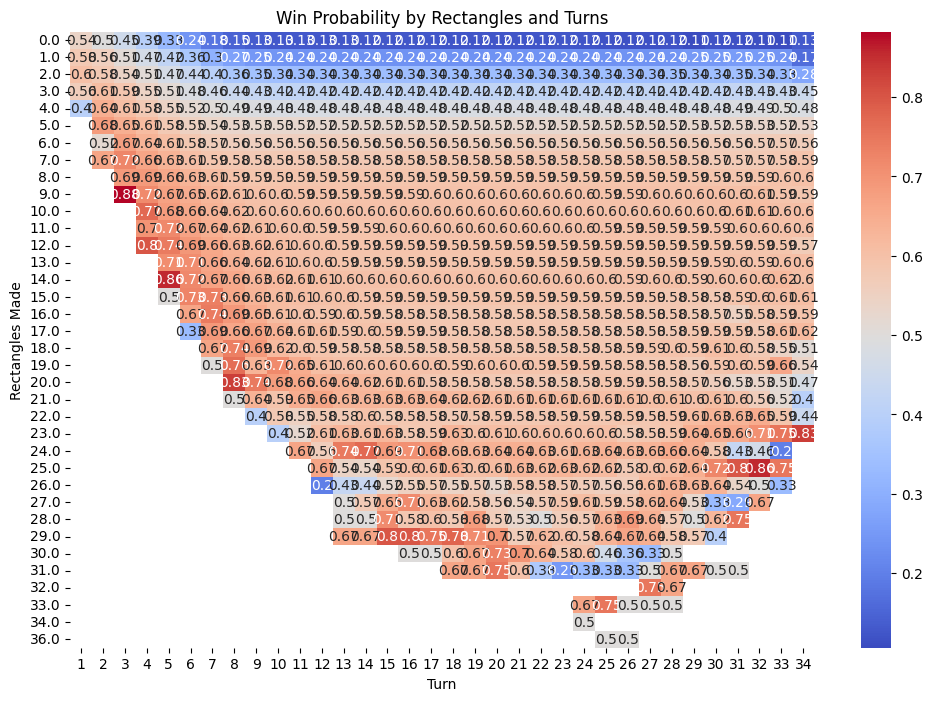

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace max_turns with the actual maximum number of turns
max_turns = final_data['num_turns'].max()

# Creating an empty DataFrame for probabilities
probabilities = pd.DataFrame()

for turn in range(1, max_turns + 1):
    print("beginning chunk...")

    turn_column = f'user_rectangles_turn_{turn}'

    # Group by rectangles count and calculate win probability
    win_prob = final_data.groupby(turn_column).apply(lambda x: x['won'].mean()).reset_index()
    win_prob.columns = ['rectangles', 'probability']
    win_prob['turn'] = turn

    # Append to the probabilities DataFrame
    probabilities = pd.concat([probabilities, win_prob])
    print("...finished!")
    
# Filter out rows where probability is exactly 1 or 0
probabilities = probabilities[(probabilities['probability'] < 1) & (probabilities['probability'] > 0)]

# Pivot the DataFrame for heatmap
pivot_data = probabilities.pivot(index="rectangles", columns="turn", values="probability")

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm')
plt.title('Win Probability by Rectangles and Turns')
plt.xlabel('Turn')
plt.ylabel('Rectangles Made')
plt.show()

